#Importaciones

Acontinuación se especifican las diferentes importaciones necesarias para el proceso


In [ ]:
!pip install mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import time
%matplotlib inline

     |████████████████████████████████| 542kB 6.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=e98155ee4271519c6c445bbac769b55262aa15c303fe66cb663a956907b5eeff
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


#Carga de datos

El dataset lo obtenemos de un archivo público de nosotros ubicado **en** drive

In [ ]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
 
url='https://docs.google.com/uc?export=download&id=1fKWYV2A2uD4jtMvbedwJufAlKjtnl5Q9'


data = pd.read_csv(url,sep=",", header=0, index_col=False,names=['pais', 'codigo_pais', 'oficina_registro', 'grupo_edad',  'edad',
           'area_ocupacion', 'sub_area_ocupacion', 'nivel_academico', 'estado_civil', 'genero',
           'etnia', 'estatura', 'localizacion', 'cantidad_personas'])

# Seleccionamos las columnas a utilizar
data = data[['pais', 'grupo_edad', 'edad','area_ocupacion', 'sub_area_ocupacion', 'nivel_academico', 'estado_civil', 'genero',
           'etnia', 'estatura','cantidad_personas']]

# Hacemos una pequeña visualización de los datos
display(data.head())
data.shape

,pais,grupo_edad,edad,area_ocupacion,sub_area_ocupacion,nivel_academico,estado_civil,genero,etnia,estatura,cantidad_personas
0,FRANCIA,ADULTO JOVEN,25,"INGENIERÍA, ARQUITECTURA Y AFINES",OTRAS INGENIERÍAS,NO INDICA,SOLTERO,MASCULINO,OTRO,-1,1
1,BRASIL,ADULTO JOVEN,25,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,OTRO,-1,8
2,ESPAÑA,ADULTO JOVEN,25,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,MASCULINO,OTRO,177,1
3,CANADA,ADULTO JOVEN,25,CIENCIAS SOCIALES Y HUMANAS,PSICOLOGÍA Y AFINES,NO INDICA,DESCONOCIDO,FEMENINO,OTRO,-1,1
4,ECUADOR,ADULTO JOVEN,25,NINGUNA,NINGUNA,NO INDICA,UNION_LIBRE,MASCULINO,OTRO,-1,4


(167842, 11)

#Eliminación de datos nulos (nan)

En la revisión del dataset, se encontró que existían valores en donde no se encontraba información registrada y por lo tanto venía categorizada con etiquetas específicas, es por esta razón que se decidió reemplazar estas categorías por NaN y posteriormente se hizo su respectiva eliminación.
Los valores según no se nos indico en el dataset que no tenía información fueron:


*   Area_ocupacion, nivel_academico como 'NO INDICA'
*   Estado civil y genero como 'DESCONOCIDO'
*   Etnia como 'SIN ETNIA REGISTRADA'
*   Estatura como '-1'

In [ ]:
data = pd.DataFrame(data)
from numpy import nan

#Marcamos los datos indicados como nan en la data principal
data[['area_ocupacion']] = data[['area_ocupacion']].replace('NO INDICA', nan)
data[['nivel_academico']] = data[['nivel_academico']].replace('NO INDICA', nan)
data[['estado_civil']] = data[['estado_civil']].replace('DESCONOCIDO', nan)
data[['genero']] = data[['genero']].replace('DESCONOCIDO', nan)
data[['etnia']] = data[['etnia']].replace('SIN ETNIA REGISTRADA', nan)
data[['estatura']] = data[['estatura']].replace(-1, nan)
data[['etnia']] = data[['etnia']].replace('PALENQUERO DE SAN BASILO', 'PALENQUERO DE SAN BASILIO')
# se borran los datos marcados como NAN
data_remnan=data.copy()
data_remnan.dropna(inplace=True)

# summarize y shape de los datos removidos
print(data.shape)
print(data_remnan.shape)

(167842, 11)
(19497, 11)


#Modificación de datos anómalos.

Se identificó a través de la grafica de bigotes que existen outliers para este dato




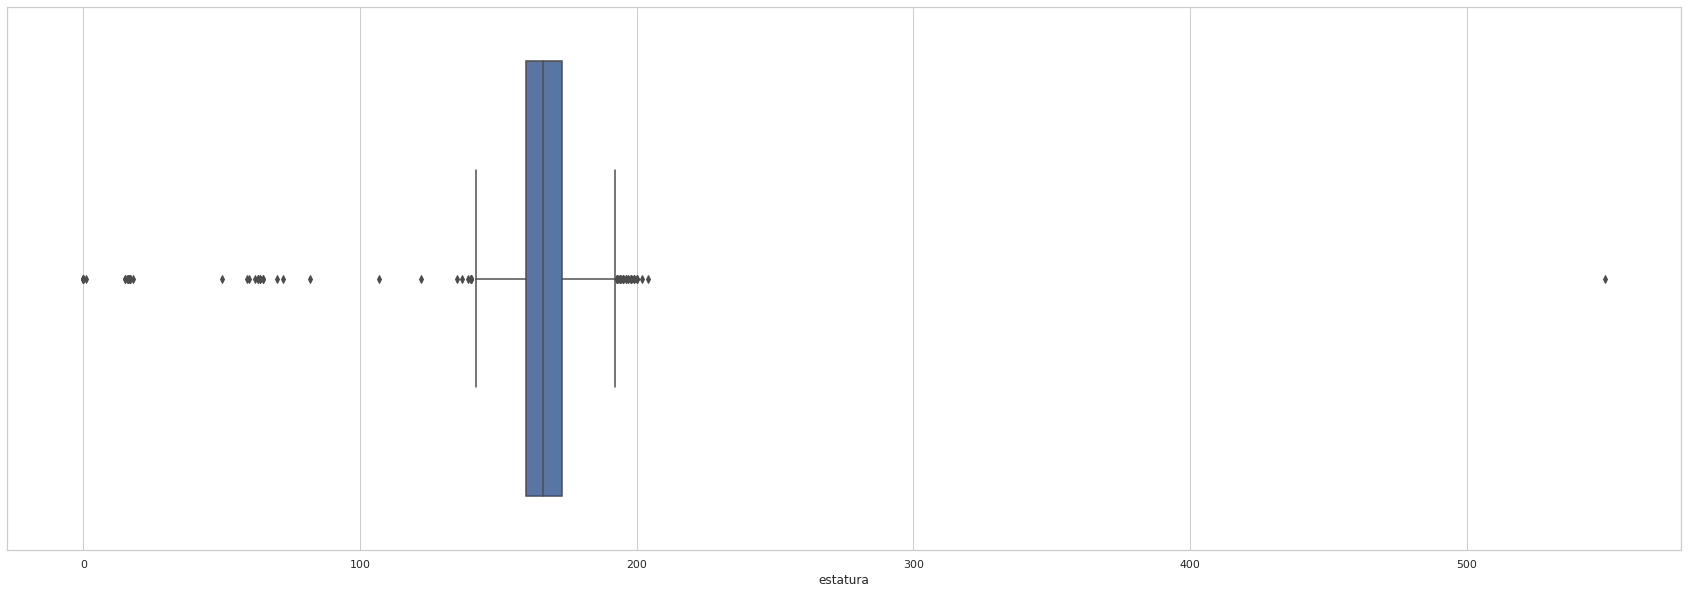

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid")
tips = data_remnan
ax = sns.boxplot(x=tips["estatura"])

Se calculan los cuartiles, el rango intercuartil y los respectivos bigote superior e inferior.


In [ ]:
Q1= data_remnan['estatura'].quantile(0.25)
print("primer cuartil",Q1)

Q3= data_remnan['estatura'].quantile(0.75)
print(" tercer cuartil",Q3)

IQR = Q3 - Q1
print("rango intercuartil",IQR)

mediana = data_remnan['estatura'].median()
print("mediana",mediana)

v_min = data_remnan['estatura'].min()
print("minimo",v_min)

v_max= data_remnan['estatura'].max()
print("maximo",v_max)

BI_calculado = (Q1 - 1.5 * IQR )
print("BI_calculado ",BI_calculado)

BS_calculado = (Q3 + 1.5 * IQR )
print("BS_calculado",BS_calculado)

primer cuartil 160.0
 tercer cuartil 173.0
rango intercuartil 13.0
mediana 166.0
minimo 0.0
maximo 550.0
BI_calculado  140.5
BS_calculado 192.5


Se crea un dataframe (BS) con la información de los registros cuya estatura fueran mayores al bigote superior y otro dataframe (BI) con la información de los registros menores al bigote inferior.


In [ ]:
BI = data_remnan[data_remnan['estatura'] < BI_calculado]
BS = data_remnan[data_remnan['estatura'] > BS_calculado]

Se recorre el dataframe (BI) y se modificaron los valores del dataframe principal que cumplieran con que su estatura fuese igual al valor de la estatura de BI como nan.

Se reemplazan los nan de valores inferiores al bigote inferior por la mediana

In [ ]:
print(data_remnan.shape)
for indice,fila in BI.iterrows():
  data_remnan['estatura'] = data_remnan['estatura'].replace(fila['estatura'] , nan)
print(data_remnan.shape)

print('Median Values')
data_remnan.fillna(data_remnan['estatura'].median(), inplace=True)
print(data_remnan.shape)

(19497, 11)
(19497, 11)
Median Values
(19497, 11)


Se recorre el dataframe (BS) y se modificaron los valores del dataframe principal que cumplieran con que su estatura fuese igual al valor de la estatura de BS como nan.

Se reemplazan los nan de valores inferiores al bigote inferior por la moda

In [ ]:
print(data_remnan.shape)
for indice,fila in BS.iterrows():
  data_remnan['estatura'] = data_remnan['estatura'].replace(fila['estatura'] , nan)
print(data_remnan.shape)

print('Mode Values')
data_remnan.fillna(data_remnan['estatura'].mode(dropna=True).iloc[0], inplace=True)
print(data_remnan.shape)

(19497, 11)
(19497, 11)
Mode Values
(19497, 11)


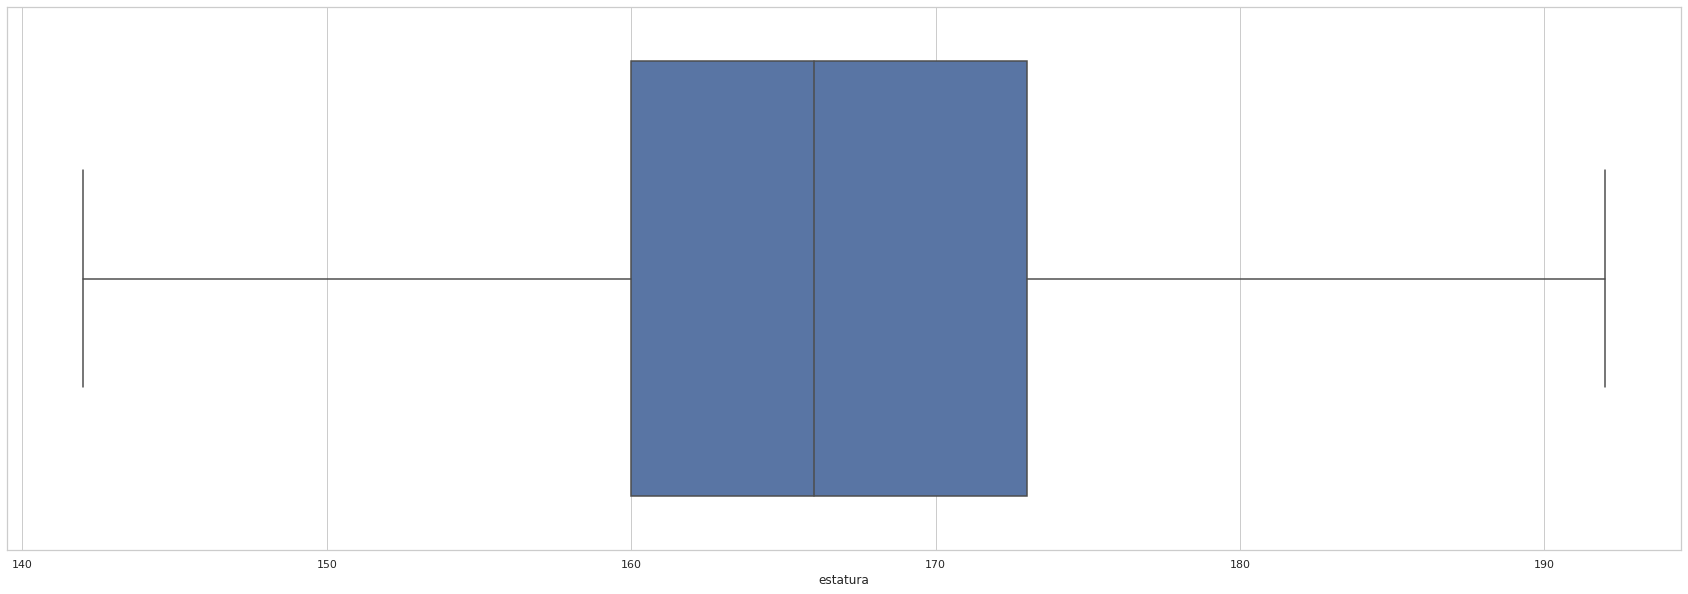

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(30,10))
sns.set_theme(style="whitegrid")
tips = data_remnan
ax = sns.boxplot(x=tips["estatura"])

Grafica antes del tratamiento a la estatura


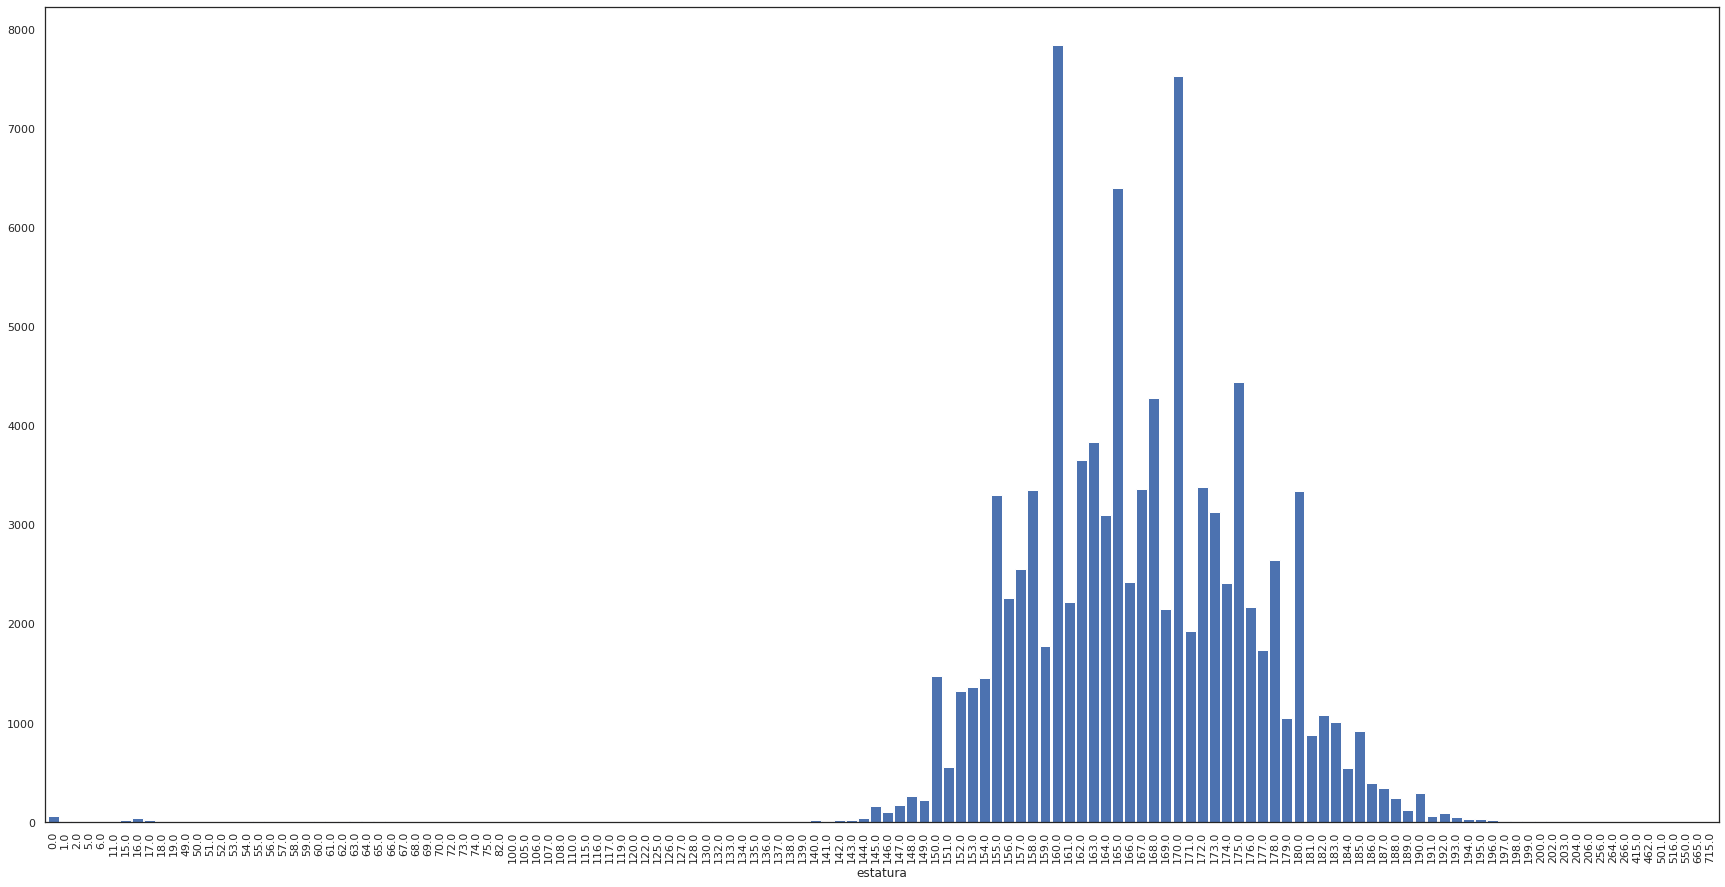

In [ ]:
fig=plt.figure(figsize=(30,15))
sns.set_theme(style="white")
data.groupby('estatura')['cantidad_personas'].sum().plot(kind='bar',width = 0.9)

Grafica despues del tratamiento a la estatura

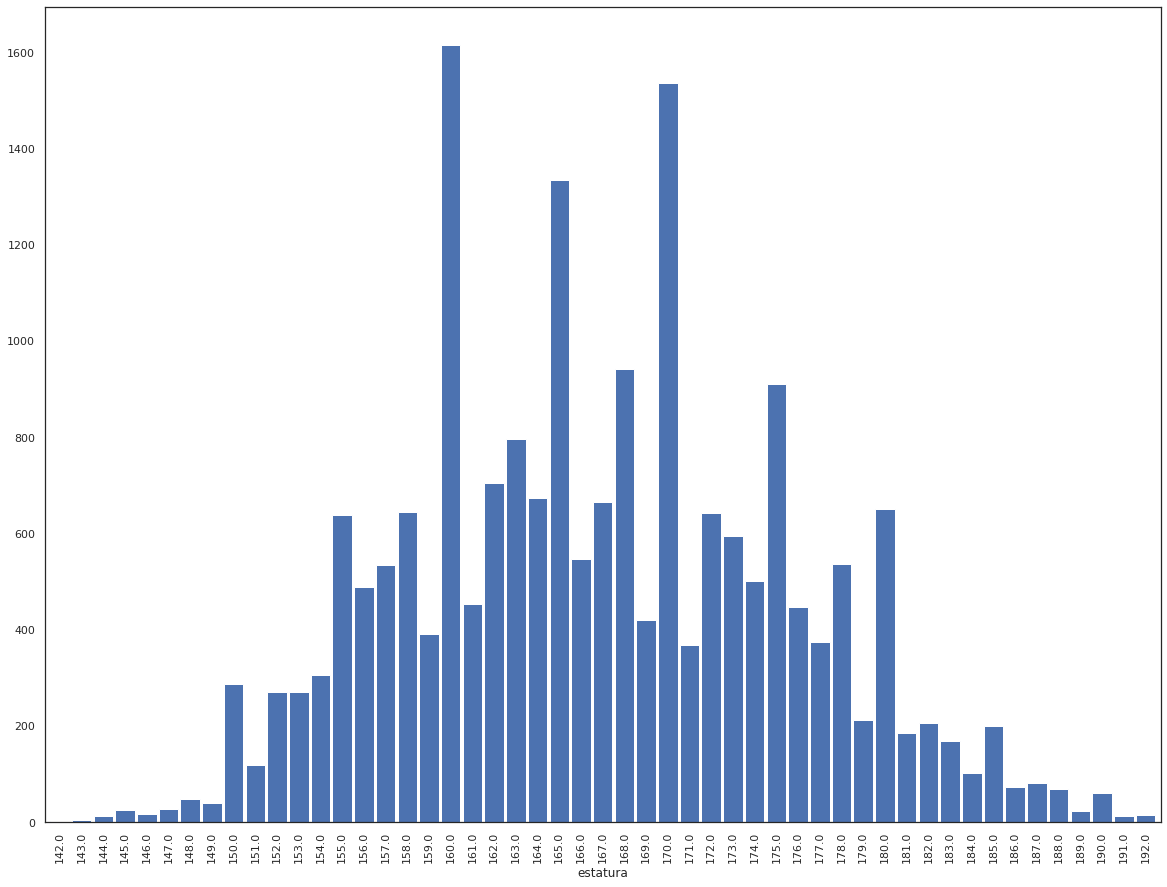

In [ ]:
fig=plt.figure(figsize=(20,15))
sns.set_theme(style="white")
data_remnan.groupby('estatura')['cantidad_personas'].sum().plot(kind='bar',width = 0.9)

#EXPLOSIÓN DE DATOS

Se crean dos dataframe con la información de los datos cuyo campo cantidad_personas es diferente de 1 (data_diferente_1) y otro con los registros de cantidad_personas igual a 1 (data_igual_1)

In [ ]:
#Filtramos dataframe para no recorrer los registros iguales a 1
data_diferente_1 = data_remnan[data_remnan['cantidad_personas'] != 1]
data_igual_1 = data_remnan[data_remnan['cantidad_personas'] == 1]

print ("Data original sin nan: ",data_remnan.shape)
print ("Data con cantidad de personas diferente a 1: ", data_diferente_1.shape)
print ("Data con cantidad de personas igual a 1: ",data_igual_1.shape)
print ("La cantidad de registros que se deberan insertar son: ", data_diferente_1['cantidad_personas'].sum())
print ("La nueva data tendrá la siguiente cantidad de registros: ",data_igual_1['cantidad_personas'].sum() + data_diferente_1['cantidad_personas'].sum() )

Data original sin nan:  (19497, 11)
Data con cantidad de personas diferente a 1:  (570, 11)
Data con cantidad de personas igual a 1:  (18927, 11)
La cantidad de registros que se deberan insertar son:  1290
La nueva data tendrá la siguiente cantidad de registros:  20217


Recorremos el dataframe data_diferente_1 para multiplicar la información, es decir, insertar la cantidad de registros iguales a su información segun indique su campo cantidad_personas, creando un nuevo dataframe llamado data_tem el cúal contendrá estos nuevos registros

In [ ]:
#inicializamos dataframe temporal
data_tem = pd.DataFrame()

#recorremos el dataframe con los registros de cantidad de personas =! a 1
for indice,fila in data_diferente_1.iterrows():
  #asignamos la cantidad de personas como variable para el recorrido de inserción 
  cant_registros=fila['cantidad_personas']
  count = 0
  while count < cant_registros:
    #creamos un dataframe auxiliar solo con las columnas
    df_aux = pd.DataFrame(columns=['pais', 'grupo_edad', 'edad','area_ocupacion', 'sub_area_ocupacion', 'nivel_academico', 'estado_civil', 'genero',
                               'etnia', 'estatura','cantidad_personas'])
    #agregamos el nuevo registro con cantidad en 1
    df_aux = df_aux.append({'pais': fila['pais'] ,'grupo_edad':fila['grupo_edad'],  'edad':fila['edad'],
                         'area_ocupacion':fila['area_ocupacion'], 'sub_area_ocupacion':fila['sub_area_ocupacion'],
                         'nivel_academico':fila['nivel_academico'], 'estado_civil':fila['estado_civil'], 'genero':fila['genero'],
                         'etnia':fila['etnia'], 'estatura':fila['estatura'],  'cantidad_personas':1},ignore_index=True)
    
    #concatenamos el dataframe auxiliar al dataframe temporal, el cual tendra los registros ya explosionados
    data_tem = pd.concat([data_tem, df_aux])
    #sumamos 1 al contador para agragar la cantidad de registros adecuada
    count = count +1

Se tomá el dataframe data_tem el cual contiene los registros explosionados y lo unimos al dataframe data_igual_1, el cual contiene el resto de registros de nuestro dataset y finalmente regeneramos indices

In [ ]:
#visualizamos la data temporal explosionada
print(data_tem)
#unimos los dos dataframes
print(data_igual_1.shape)
print(data_tem.shape)
data_expl= pd.concat([data_igual_1,data_tem])
#regeneramos indices
data_expl.reset_index(drop=True, inplace=True)
print(data_expl)

              pais    grupo_edad edad  ...    etnia estatura cantidad_personas
0           ESPAÑA  ADULTO JOVEN   25  ...  NINGUNA    157.0                 1
0           ESPAÑA  ADULTO JOVEN   25  ...  NINGUNA    157.0                 1
0           ESPAÑA  ADULTO JOVEN   25  ...     OTRO    158.0                 1
0           ESPAÑA  ADULTO JOVEN   25  ...     OTRO    158.0                 1
0           ESPAÑA  ADULTO JOVEN   25  ...  NINGUNA    178.0                 1
..             ...           ...  ...  ...      ...      ...               ...
0           ESPAÑA        ADULTO   40  ...     OTRO    173.0                 1
0           ESPAÑA        ADULTO   40  ...  NINGUNA    160.0                 1
0           ESPAÑA        ADULTO   40  ...  NINGUNA    160.0                 1
0   ESTADOS UNIDOS        ADULTO   40  ...  NINGUNA    180.0                 1
0   ESTADOS UNIDOS        ADULTO   40  ...  NINGUNA    180.0                 1

[1290 rows x 11 columns]
(18927, 11)
(1290, 11)
   

Para aplicar el metodo de balanceo, fue necesario eliminar los registros que fueran inferiores a 6, ya que se generaba un error al ejecutar

In [ ]:
registros_menores_6= data_expl.groupby(['pais']).size().reset_index(name='cantidad_reg')
registros_menores_6 = registros_menores_6[registros_menores_6['cantidad_reg'] <= 6]
registros_menores_6.reset_index(drop=True, inplace=True)
print(registros_menores_6)

                                    pais  cantidad_reg
0                         ARABIA SAUDITA             6
1                                ARGELIA             1
2                             AZERBAIYAN             2
3                   BOSNIA Y HERZEGOVINA             1
4                               BULGARIA             1
5                                 EGIPTO             5
6                             ESLOVAQUIA             1
7                              ESLOVENIA             2
8                                ESTONIA             1
9                              FILIPINAS             4
10                                 GABON             1
11                                 GHANA             3
12                                GRECIA             1
13                                GUINEA             1
14                                 HAITI             3
15                               HUNGRIA             6
16                                 INDIA             5
17        

Se procede a eliminar estos registros.

In [ ]:
print(data_expl.shape)
for indice,fila in registros_menores_6.iterrows():
  #asignamos la cantidad de personas como variable para el recorrido de inserción
  pais_r=fila['pais'] 
  #print (pais_r)
  data_expl = data_expl.drop(data_expl[data_expl['pais']==pais_r].index)
  #print(fila['pais'])
print(data_expl.shape)

(20217, 11)
(20122, 11)


#Categorización de los datos 
Dado que algunos de los algoritmos solo permitian datos numéricos y por lo tanto fue necesario la realización de una categorización de las características cualitativas, para la realización de este proceso convertimos a category cada una de las características cualitativas como género, etnia, estado_civil, etc.


In [ ]:
data_expl.pais=data_expl.pais.astype("category").cat.codes
data_expl.grupo_edad = data_expl.grupo_edad.astype("category").cat.codes
data_expl.area_ocupacion=data_expl.area_ocupacion.astype("category").cat.codes
data_expl.sub_area_ocupacion=data_expl.sub_area_ocupacion.astype("category").cat.codes
data_expl.nivel_academico=data_expl.nivel_academico.astype("category").cat.codes
data_expl.estado_civil=data_expl.estado_civil.astype("category").cat.codes
data_expl.genero=data_expl.genero.astype("category").cat.codes
data_expl.etnia=data_expl.etnia.astype("category").cat.codes

Definimos los datos

In [ ]:
X = data_expl[['grupo_edad', 'edad','area_ocupacion', 'sub_area_ocupacion', 'nivel_academico', 'estado_civil', 'genero',
           'etnia', 'estatura']]
        
y = data_expl.pais

#Balanceo de datos


In [ ]:
from imblearn.combine import SMOTETomek
oversample = SMOTETomek("all")
X_over, y_over = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Dividimos los datos de prueba y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,
                                                    random_state=0)

#Aplicamos los modelos de ML

#RNA

In [ ]:
inicio = time.time()
# Código a medir
time.sleep(1)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', random_state=0, max_iter=300, learning_rate= 'adaptive',activation = 'logistic').fit(X_train, y_train)

print("RNA Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("RNA Train set score: {:.2f}".format(mlp.score(X_train, y_train)))

fin = time.time()
print("Tiempo total de ejecución en segundos:" , fin-inicio)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RNA Test set score: 0.49
RNA Train set score: 0.50
Tiempo total de ejecución en segundos: 979.5912084579468


Por incompatibilidad de versiones y para poder hacer uso de las metricas fue necesario subir la versión, sin embargo, el algoritmo de RNA nos generaba conflicto por eso procuramos ejecutarlo antes

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==0.24.2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 1.7MB/s 


In [ ]:
inicio = time.time()
# Código a medir
time.sleep(1)
y_pred=mlp.predict(X_test)

print("Test mean_squared_error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("Test accuracy_score: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Test precision_score: {:.3f}".format(precision_score(y_test,y_pred, average='weighted')))
print("Test recall_score: {:.3f}".format(recall_score(y_test,y_pred, average='weighted')))
print("Test f1_score: {:.3f}".format(f1_score(y_test,y_pred, average='weighted')))
fin = time.time()
print("Tiempo total de ejecución en segundos:" , fin-inicio)

Test mean_squared_error: 3.096
Test accuracy_score: 0.493
Test precision_score: 0.425
Test recall_score: 0.493
Test f1_score: 0.438
Tiempo total de ejecución en segundos: 1.6353273391723633


#KNN

In [ ]:
inicio = time.time()
# Código a medir
time.sleep(1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))

y_pred=knn.predict(X_test)

print("Test mean_squared_error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("Test accuracy_score: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Test precision_score: {:.3f}".format(precision_score(y_test,y_pred, average='weighted')))
print("Test recall_score: {:.3f}".format(recall_score(y_test,y_pred, average='weighted')))
print("Test f1_score: {:.3f}".format(f1_score(y_test,y_pred, average='weighted')))
fin = time.time()
print("Tiempo total de ejecución en segundos:" , fin-inicio)

Test set score: 0.92
Train set score: 0.99
Test mean_squared_error: 0.943
Test accuracy_score: 0.922
Test precision_score: 0.917
Test recall_score: 0.922
Test f1_score: 0.919
Tiempo total de ejecución en segundos: 19.85611605644226


#SVM

In [ ]:
inicio = time.time()
# Código a medir
time.sleep(1)
from sklearn import svm
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo',max_iter =-1).fit(X_train, y_train)
print("rbf Test set score: {:.2f}".format(rbf.score(X_test, y_test)))
print("rbf Train set score: {:.2f}".format(rbf.score(X_train, y_train)))

y_pred=rbf.predict(X_test)

print("Test mean_squared_error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("Test accuracy_score: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Test precision_score: {:.3f}".format(precision_score(y_test,y_pred, average='weighted')))
print("Test recall_score: {:.3f}".format(recall_score(y_test,y_pred, average='weighted')))
print("Test f1_score: {:.3f}".format(f1_score(y_test,y_pred, average='weighted')))
fin = time.time()
print("Tiempo total de ejecución en segundos:" , fin-inicio)

rbf Test set score: 0.90
rbf Train set score: 0.96


#RF

In [ ]:
inicio = time.time()
# Código a medir
time.sleep(1)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("Test set score: {:.3f}".format(forest.score(X_test, y_test)))
print("Train set score: {:.3f}".format(forest.score(X_train, y_train)))

y_pred=forest.predict(X_test)

print("Test mean_squared_error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("Test accuracy_score: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Test precision_score: {:.3f}".format(precision_score(y_test,y_pred, average='weighted')))
print("Test recall_score: {:.3f}".format(recall_score(y_test,y_pred, average='weighted')))
print("Test f1_score: {:.3f}".format(f1_score(y_test,y_pred, average='weighted')))
fin = time.time()
print("Tiempo total de ejecución en segundos:" , fin-inicio)

Test set score: 0.873
Train set score: 0.983
Test mean_squared_error: 1.566
Test accuracy_score: 0.873
Test precision_score: 0.869
Test recall_score: 0.873
Test f1_score: 0.870
Tiempo total de ejecución en segundos: 8.730777502059937


#XGBoost

In [ ]:
inicio = time.time()
# Código a medir
time.sleep(1)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
xgbc = XGBClassifier(objective= 'multi:softmax',num_class= 99,gamma= 0.1,max_depth= 12,reg_lambda=2,subsample= 1,colsample_bytree=0.7,min_child_weight=3).fit(X_train, y_train)
print("Test set score: {:.3f}".format(xgbc.score(X_test, y_test)))
print("Train set score: {:.3f}".format(xgbc.score(X_train, y_train)))

y_pred=xgbc.predict(X_test)

print("Test mean_squared_error: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("Test accuracy_score: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Test precision_score: {:.3f}".format(precision_score(y_test,y_pred, average='weighted')))
print("Test recall_score: {:.3f}".format(recall_score(y_test,y_pred, average='weighted')))
print("Test f1_score: {:.3f}".format(f1_score(y_test,y_pred, average='weighted')))
fin = time.time()
print("Tiempo total de ejecución en segundos:" , fin-inicio)

Test set score: 0.872
Train set score: 0.951
Test mean_squared_error: 1.377
Test accuracy_score: 0.872
Test precision_score: 0.868
Test recall_score: 0.872
Test f1_score: 0.868
Tiempo total de ejecución en segundos: 4643.142404079437
